In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
irisData = pd.read_csv("Iris.csv") 

In [3]:
irisData.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
irisData['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
irisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Dropping the ID column 

In [6]:
irisData.drop('Id' , axis = 1 , inplace = True)

### Comparing the Sepal Length v Width wrt to all the species 

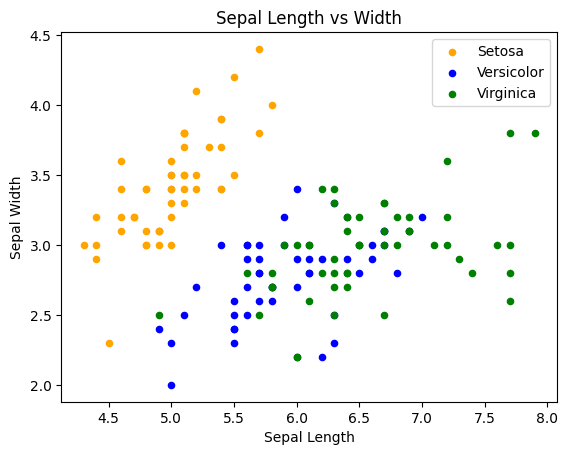

In [7]:
fig = irisData[ irisData.Species == 'Iris-setosa'].plot(kind = 'scatter' , x = 'SepalLengthCm' , y = "SepalWidthCm" , color = 'orange' , label = 'Setosa')
irisData[ irisData.Species == 'Iris-versicolor'].plot(kind = 'scatter' , x = 'SepalLengthCm', y = 'SepalWidthCm' , color = 'blue' , label = 'Versicolor', ax = fig)
irisData[ irisData.Species == 'Iris-virginica'].plot(kind = 'scatter' , x = 'SepalLengthCm' , y = 'SepalWidthCm' , color = 'green' , label = 'Virginica' , ax = fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length vs Width")

fig = plt.gcf()
plt.show()

### Comparing the Petal Length v Width wrt to all the species 

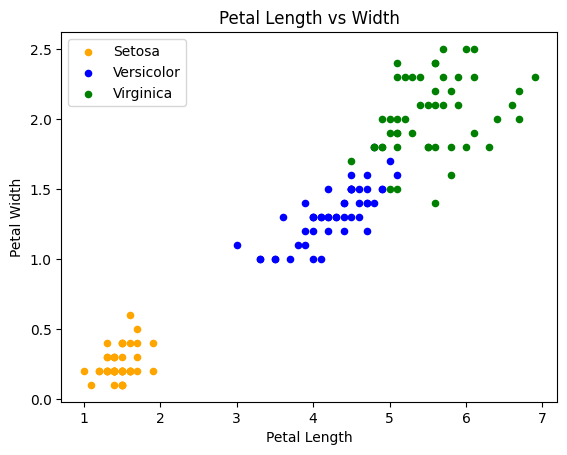

In [8]:
fig = irisData[ irisData.Species == 'Iris-setosa'].plot(kind = 'scatter' , x = 'PetalLengthCm' , y = 'PetalWidthCm' , color = 'orange' , label = 'Setosa')
irisData[ irisData.Species == 'Iris-versicolor'].plot(kind = 'scatter' , x = 'PetalLengthCm' , y = 'PetalWidthCm' , color = 'blue' , label = 'Versicolor', ax = fig)
irisData[ irisData.Species == 'Iris-virginica'].plot(kind = 'scatter' , x = 'PetalLengthCm' , y = 'PetalWidthCm' , color = 'green' , label = 'Virginica' , ax = fig)

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length vs Width")

fig = plt.gcf()
plt.show()


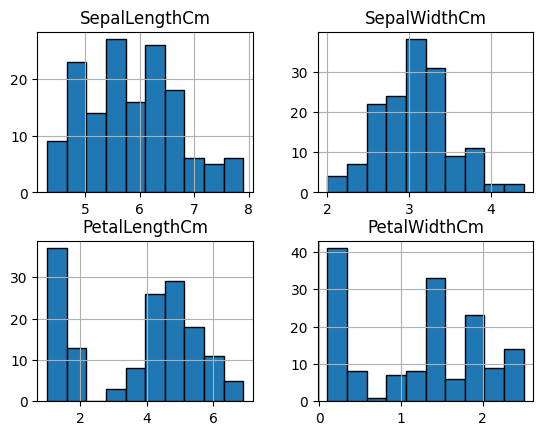

In [9]:
irisData.hist(edgecolor = 'black')

fig = plt.gcf()

plt.show()

### Lookin at Distribution of data

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

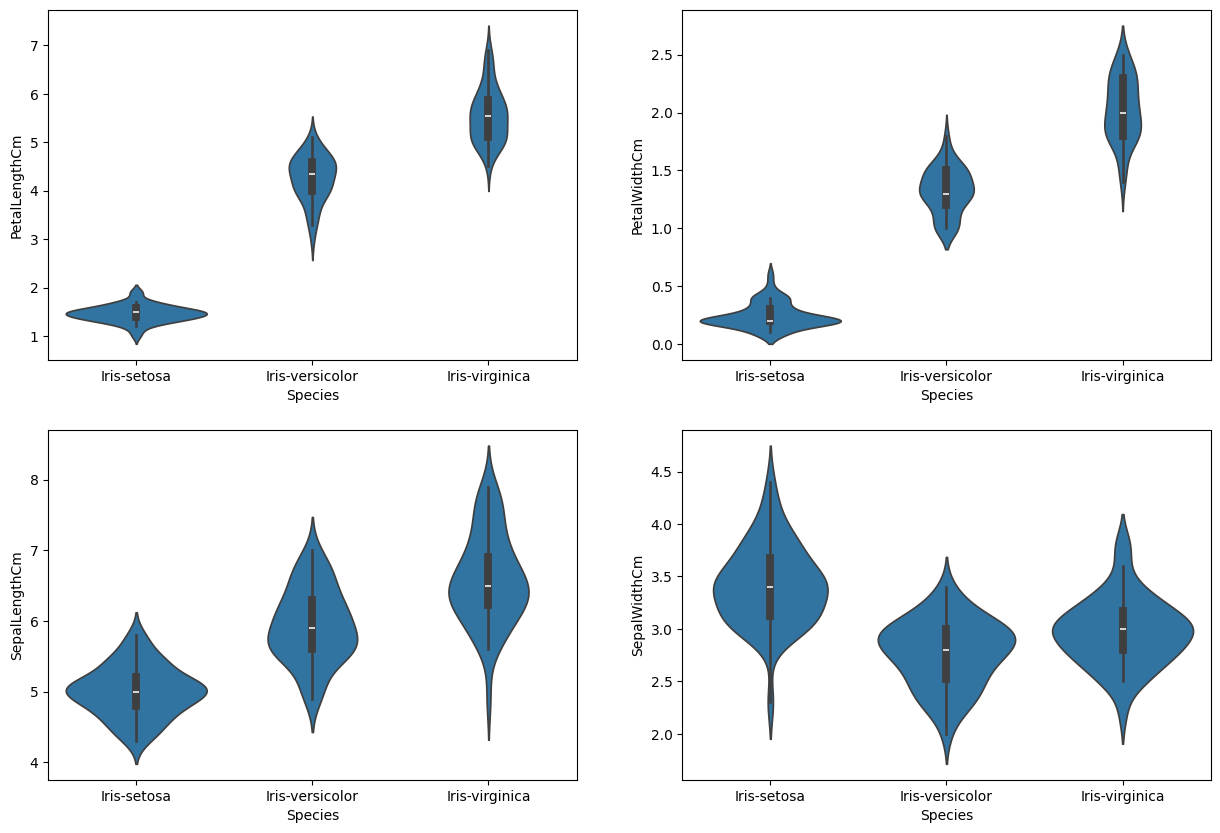

In [10]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.violinplot(x = 'Species' , y = 'PetalLengthCm' , data = irisData)

plt.subplot(2,2,2)
sns.violinplot(x = 'Species' , y = 'PetalWidthCm' , data = irisData)

plt.subplot(2,2,3)
sns.violinplot(x = 'Species' , y = 'SepalLengthCm' , data = irisData)

plt.subplot(2,2,4)
sns.violinplot(x = 'Species' , y = 'SepalWidthCm' , data = irisData)

In [11]:
irisData.shape

(150, 5)

In [12]:
irisData.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Correlation check between the attributes

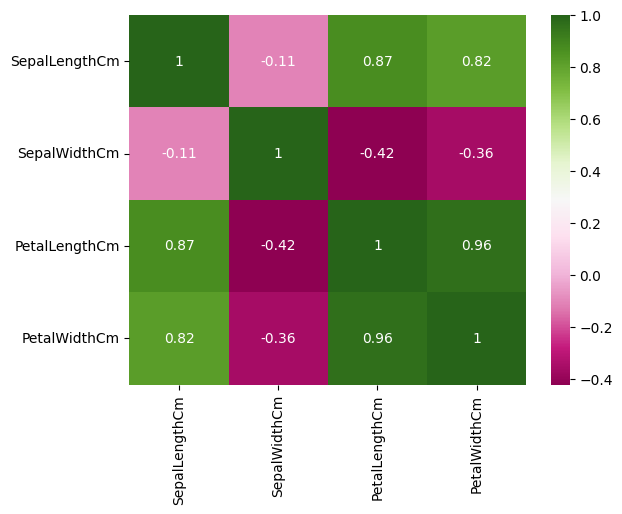

In [13]:
corrD = irisData[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm' ]]

sns.heatmap(corrD.corr() , annot =  True , cmap = 'PiYG')
plt.show()

### It can be seen that Sepal width is the least correlated feature 
first we will try the model with all features then one with excluding Sepal Width


And finally models with only sepal measures and petal measures

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

train , test = train_test_split(irisData , test_size = 0.25 , random_state = 42)

print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [15]:
X_train = train.drop(['Species'] , axis = 1)
y_train = train.Species

X_test = test.drop(['Species'] , axis = 1)
y_test = test.Species

In [16]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5


### Training the model on normal dataset

In [17]:
from sklearn import svm 

sva = svm.SVC()
sva.fit(X_train , y_train)

SVC()

In [18]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()
lr.fit(X_train , y_train)

LogisticRegression()

In [19]:
from sklearn.neighbors  import KNeighborsClassifier  

knc = KNeighborsClassifier()
knc.fit(X_train , y_train)

KNeighborsClassifier()

In [20]:
prediction = sva.predict(X_test)
print('Training score of SVM is:' , (sva.score(X_train , y_train)*100) , '%')
print('The accuracy of the SVM is', accuracy_score(prediction , y_test))

Training score of SVM is: 95.53571428571429 %
The accuracy of the SVM is 1.0


In [21]:
prediction = lr.predict(X_test)
print('Training score of Logistic Regression is:' , (lr.score(X_train , y_train)*100) , '%')
print('The accuracy of the Logistic Regression is', accuracy_score(prediction , y_test))

Training score of Logistic Regression is: 96.42857142857143 %
The accuracy of the Logistic Regression is 1.0


In [22]:
prediction = knc.predict(X_test)
print('Training score of KNN is:' , (knc.score(X_train , y_train)*100) , '%')
print('The accuracy of the KNN is', accuracy_score(prediction , y_test))

Training score of KNN is: 96.42857142857143 %
The accuracy of the KNN is 1.0


### Testing different n values

C:\Users\kswap\AppData\Local\Temp\ipykernel_36108\2405135701.py:10: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  a = a._append(pd.Series(knc.score(X_train , y_train)* 100))


([<matplotlib.axis.XTick at 0x24d9af9dfd0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

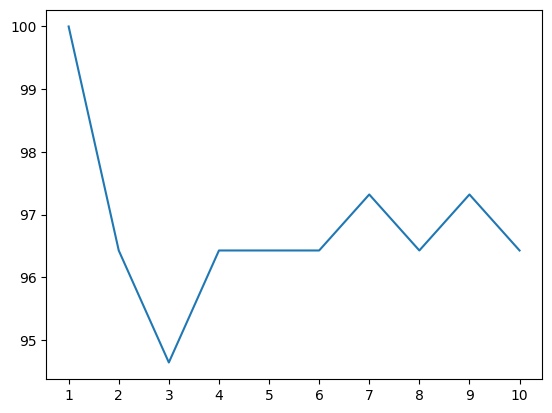

In [23]:
a_index = list(range(1,11))
a = pd.Series()

x = [1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    knc = KNeighborsClassifier(n_neighbors = i)
    knc.fit(X_train , y_train)
    prediction = knc.predict(X_test)
    a = a._append(pd.Series(knc.score(X_train , y_train)* 100))

plt.plot(a_index , a)
plt.xticks(x)

In [24]:
irisData.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### 1.Creating the dataset excluding PetalWidth
### 2.Creating Sepal only data
### 3.Creating Petal only data

In [25]:
irisM = irisData[['SepalLengthCm' , 'PetalLengthCm' , 'PetalWidthCm' , 'Species']]

irisS = irisData[['SepalLengthCm' , 'SepalWidthCm' , 'Species']]

irisP = irisData[['PetalLengthCm' , 'PetalWidthCm' , 'Species']]

In [26]:
X = irisM.drop(['Species'] , axis = 1)
y = irisM['Species']

X_trainM , X_testM , y_trainM , y_testM = train_test_split(X , y , test_size = 0.25 , random_state = 42)


#Sepal only 
X = irisS.drop(['Species'] , axis = 1)
y = irisS['Species']

X_trainS , X_testS , y_trainS , y_testS = train_test_split(X , y , test_size = 0.25 , random_state = 42)

#Petal only 
X = irisP.drop(['Species'] , axis = 1)
y = irisP['Species']

X_trainP , X_testP , y_trainP , y_testP = train_test_split(X , y , test_size = 0.25 , random_state = 42)

### SVM

In [27]:
sva = svm.SVC()
sva.fit(X_trainM , y_trainM)
prediction = sva.predict(X_testM)

print('Training score of SVM on Modified data is ' , (sva.score(X_trainM , y_trainM)*100) , '%')
print('Accuracy score of SVM is' , metrics.accuracy_score(prediction , y_testM))


#Sepal only 
sva = svm.SVC()
sva.fit(X_trainS , y_trainS)
prediction = sva.predict(X_testS)

print('Training score of SVM on Sepal only data is ' , (sva.score(X_trainS , y_trainS)*100) , '%')
print('Accuracy score of SVM is ' , accuracy_score(prediction , y_testS))


#Petal only 
sva = svm.SVC()
sva.fit(X_trainP , y_trainP)
prediction = sva.predict(X_testP)

print('Training score of SVM on Petal only data is ' , (sva.score(X_trainP , y_trainS)*100) , '%')
print('Accuracy score of SVM is ' , accuracy_score(prediction , y_testP))


Training score of SVM on Modified data is  96.42857142857143 %
Accuracy score of SVM is 1.0
Training score of SVM on Sepal only data is  79.46428571428571 %
Accuracy score of SVM is  0.8421052631578947
Training score of SVM on Petal only data is  95.53571428571429 %
Accuracy score of SVM is  1.0


### Logistic Regression 

In [28]:
lr = LogisticRegression()
lr.fit(X_trainM , y_trainM)
prediction = lr.predict(X_testM)

print('Training score of Logistic Regression on Modified data is ' , (lr.score(X_trainM , y_trainM)*100) , '%' )
print('Accuracy score of ' , accuracy_score(prediction , y_testM))


#Sepal only 
lr = LogisticRegression()
lr.fit(X_trainS , y_trainS)
prediction = lr.predict(X_testS)

print('Training score of Logistic Regression on Sepal data is ' , (lr.score(X_trainS , y_trainS)*100) , '%' )
print('Accuracy score of ' , accuracy_score(prediction , y_testS))


#Petal only 
lr = LogisticRegression()
lr.fit(X_trainP , y_trainP)
prediction = lr.predict(X_testP)

print('Training score of Logistic Regression on Petal data is ' , (lr.score(X_trainP , y_trainP)*100) , '%' )
print('Accuracy score of ' , accuracy_score(prediction , y_testP))



Training score of Logistic Regression on Modified data is  96.42857142857143 %
Accuracy score of  1.0
Training score of Logistic Regression on Sepal data is  80.35714285714286 %
Accuracy score of  0.8421052631578947
Training score of Logistic Regression on Petal data is  95.53571428571429 %
Accuracy score of  1.0
